In [21]:
%matplotlib inline
!pip install scikit-learn
!pip install seaborn
!pip install geopandas matplotlib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from glob import glob
import geopandas as gpd

from scipy.spatial import distance_matrix
from sklearn.preprocessing import MinMaxScaler

# Para no mostrar 'Future Warnings' producto de que algunos paquetes aún
# trabajan con versiones no actualizadas de otros paquetes
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [22]:
DATOS_generales = pd.read_csv('./datos_proyecto_general_filtrados.csv')

In [23]:
DATOS_generales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5075 entries, 0 to 5074
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Fecha de venta         5075 non-null   object 
 1   Nombre                 5075 non-null   object 
 2   Ciudad                 5075 non-null   object 
 3   País                   5075 non-null   object 
 4   Importe del pedido     5075 non-null   float64
 5   Cantidad de descuento  5075 non-null   float64
 6   Total del pedido       5075 non-null   float64
dtypes: float64(3), object(4)
memory usage: 277.7+ KB


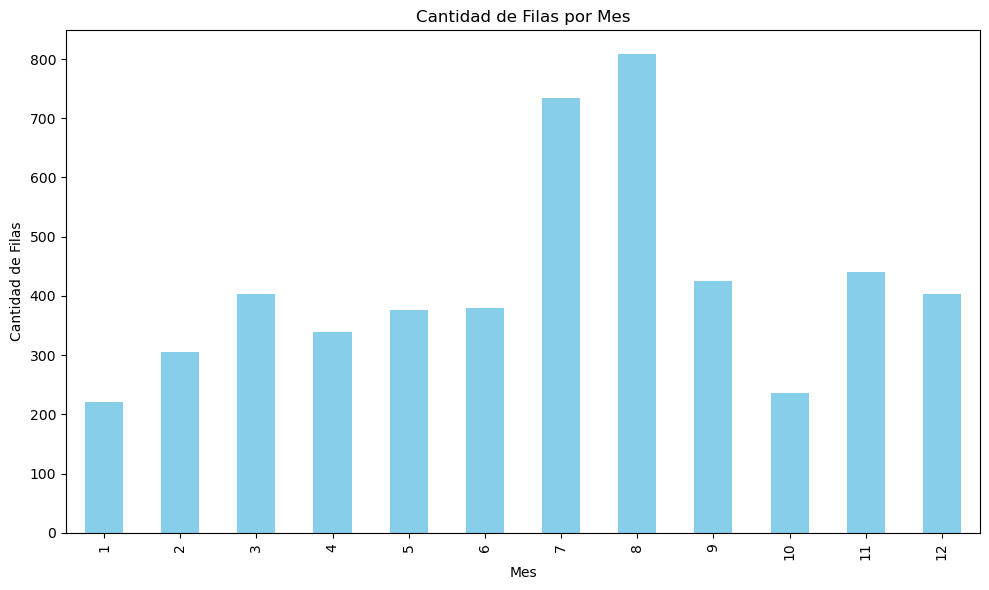

In [24]:
# Convertir la columna 'Fecha' al formato datetime si aún no lo está
DATOS_generales['Fecha de venta'] = pd.to_datetime(DATOS_generales['Fecha de venta'])

# Agrupar los datos por mes y contar el número de filas en cada grupo
conteo_por_mes = DATOS_generales.groupby(DATOS_generales['Fecha de venta'].dt.month).size()

# Crear un gráfico de barras para visualizar los recuentos de filas por mes
fig, ax = plt.subplots(figsize=(10, 6))
conteo_por_mes.plot(kind='bar', color='skyblue', ax=ax)
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad de Filas')
ax.set_title('Cantidad de Filas por Mes')

# Ajustar el diseño para que no se corten las etiquetas del eje x
plt.tight_layout()

# Eliminar el fondo fuera del gráfico
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)

# Guardar la gráfica
plt.savefig('Filas_por_mes.png', transparent=True)

# Mostrar la gráfica
plt.show()

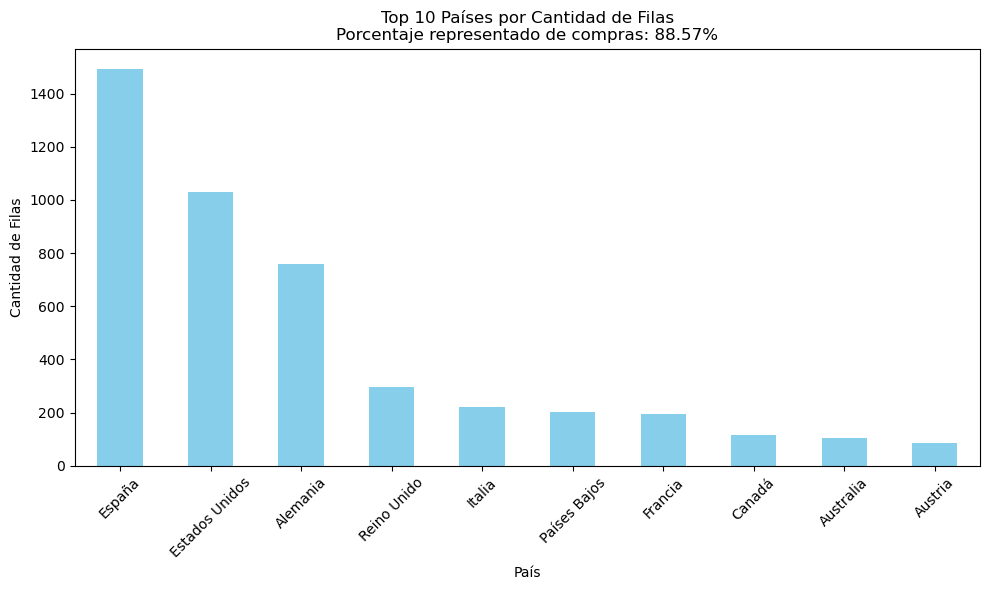

In [20]:
conteo_por_pais = DATOS_generales.groupby(DATOS_generales['País']).size()

conteo_por_pais_sorted = conteo_por_pais.sort_values(ascending=False)
# Seleccionar los 10 países con el mayor número de filas
top_10_paises = conteo_por_pais_sorted.head(10)

fig, ax = plt.subplots(figsize=(10, 6))
top_10_paises.plot(kind='bar', color='skyblue', ax=ax)

# Configurar etiquetas y título
ax.set_xlabel('País')
ax.set_ylabel('Cantidad de Filas')
ax.set_title('Top 10 Países por Cantidad de Filas\nPorcentaje representado de compras: {}%'
             .format(round(top_10_paises.sum() / len(DATOS_generales) * 100, 2)))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Eliminar el fondo fuera de la gráfica
fig.patch.set_visible(False)
ax.patch.set_alpha(0)  # Ajustar transparencia del fondo de la gráfica

# Ajustar los márgenes para que las etiquetas no se corten
plt.tight_layout()

# Guardar la gráfica
plt.savefig('grafico_top_10_ventas_por_pais.png', bbox_inches='tight')

# Mostrar la gráfica
plt.show()

In [17]:
paises_hispanohablantes = [
    'Argentina', 'Bolivia', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Ecuador', 'El Salvador',
    'España', 'Guatemala', 'Honduras', 'México', 'Nicaragua', 'Panamá', 'Paraguay', 'Perú',
    'República Dominicana', 'Uruguay', 'Venezuela'
]

In [18]:
conteo_hispanohablantes = DATOS_generales['País'].apply(lambda x: isinstance(x, str)
                                                        and any(pais in x for pais in paises_hispanohablantes)).sum()
conteo_no_hispanohablantes = len(DATOS_generales) - conteo_hispanohablantes
print((conteo_hispanohablantes, conteo_no_hispanohablantes))

(1516, 3559)


In [19]:
(len(DATOS_generales) - conteo_hispanohablantes)/len(DATOS_generales)

0.7012807881773399

(-1.099998461349162,
 1.0999964964565867,
 -1.0999978529279895,
 1.0999965951035482)

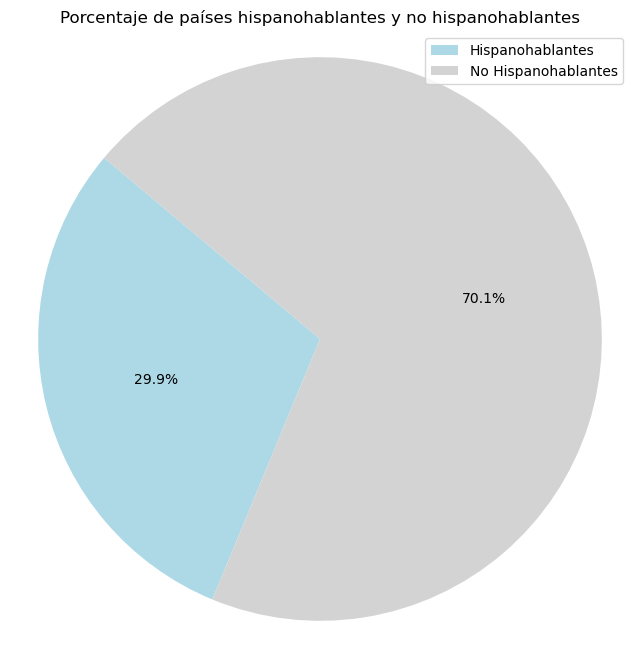

In [20]:
etiquetas = ['Hispanohablantes', 'No Hispanohablantes']
porcentajes = [conteo_hispanohablantes, conteo_no_hispanohablantes]

# Colores
colores = ['lightblue', 'lightgrey']

# Crear la gráfica de tarta
plt.figure(figsize=(8, 8))
patches, texts, _ = plt.pie(porcentajes, colors=colores, startangle=140, autopct='%1.1f%%')

# Añadir etiquetas
plt.legend(patches, etiquetas, loc="best")

# Añadir título
plt.title('Porcentaje de países hispanohablantes y no hispanohablantes')

# Mostrar la gráfica
plt.axis('equal')  # Aspecto de círculo